In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import math
import seaborn as sns
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from pathlib import Path
BASE_DIR = Path().absolute().parent.parent
DIR = BASE_DIR/'scripts_res'/'Algorithms'
DIR

WindowsPath('d:/OneDrive/Current/2_Codes/BO_Related/ASBO/ASBO/scripts_res/Algorithms')

In [3]:
def cleaning(df2,n_init,iter,opt):
    cumulative_max_df = pd.DataFrame()
    
    for index, row in df2.iterrows():
        initial_max = row[list(range(n_init))].max()
        cumulative_max_list = [initial_max]
        current_max = initial_max
        for iter_value in row[list(range(n_init,n_init+iter,1))]:
            if iter_value > current_max:
                current_max = iter_value  
            cumulative_max_list.append(current_max)  
        cumulative_max_df = pd.concat([cumulative_max_df, pd.DataFrame([cumulative_max_list])], ignore_index=True)
    cumulative_max_df.columns = [f'iter_{i+1}' for i in range(iter+1)]
    cumulative_max_df = cumulative_max_df.replace(-np.inf, np.nan)
    non_inf_counts =  cumulative_max_df.count()
    std = cumulative_max_df.std()
    mean = cumulative_max_df.mean(axis=0)
    regret_mean = np.log10(opt - mean)
    upper = np.log10(opt - mean + 1.96*std/np.sqrt(non_inf_counts)) #cumulative_max_df.shape[0]
    lower = np.log10(opt - mean - 1.96*std/np.sqrt(non_inf_counts))

    return cumulative_max_df,regret_mean,lower,upper,non_inf_counts

In [4]:
file_path1 = DIR/'ASBO_Results2_Case3_100.csv' 
file_path2 = DIR/'CBO_Results2_Case3_100.csv' 
file_path3 = DIR/'SCBO_Results2_Case3_100.csv' 

df = pd.read_csv(file_path1)
a,regret_mean_ASBO,lower_ASBO,upper_ASBO,non_ASBO = cleaning(df,n_init=100,iter=200,opt=-1.070)
df = pd.read_csv(file_path2)
b,regret_mean_CBO,lower_CBO,upper_CBO,non_CBO = cleaning(df,n_init=100,iter=200,opt=-1.070)
df = pd.read_csv(file_path3)
c,regret_mean_SCBO,lower_SCBO,upper_SCBO,non_SCBO = cleaning(df,n_init=100,iter=200,opt=-1.070)


e:\ProgramData\miniconda3\envs\ASBO\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


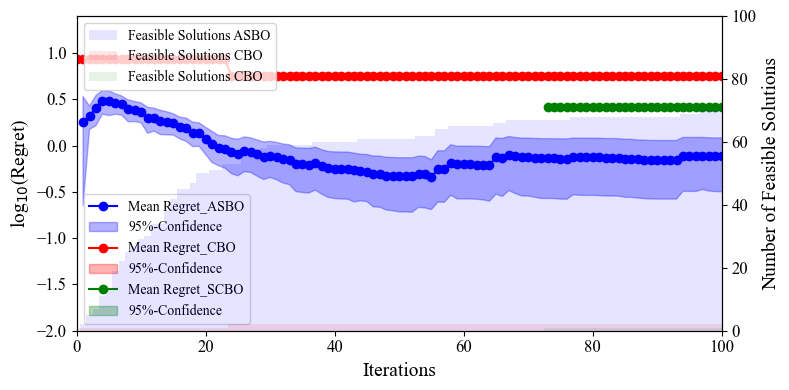

In [6]:
plt.figure(figsize=(8, 4))
iterations = range(201)

plt.plot(iterations, regret_mean_ASBO, marker='o', color='b', label='Mean Regret_ASBO')
plt.fill_between(iterations, lower_ASBO , upper_ASBO, color='b', alpha=0.3, label='95%-Confidence')

plt.plot(iterations, regret_mean_CBO, marker='o', color='r', label='Mean Regret_CBO')
plt.fill_between(iterations, lower_CBO , upper_CBO, color='r', alpha=0.3, label='95%-Confidence')

plt.plot(iterations, regret_mean_SCBO, marker='o', color='g', label='Mean Regret_SCBO')
plt.fill_between(iterations, lower_SCBO , upper_SCBO, color='g', alpha=0.3, label='95%-Confidence')

plt.xlabel('Iterations', fontsize=14)
plt.xlim(0,100)
plt.ylim(-2,1.4)
# plt.ylabel(r"$\log_{10}(\mathrm{Regret})$", fontsize=14)
plt.ylabel(r"log$_{10}$(Regret)", fontsize=14)
plt.legend(ncol=1)

ax2 = plt.gca().twinx()
ax2.bar(iterations, non_ASBO, color='blue', alpha=0.1, label='Feasible Solutions ASBO', width=1.0)
ax2.bar(iterations, non_CBO, color='red', alpha=0.1, label='Feasible Solutions CBO', width=1.0)
ax2.bar(iterations, non_SCBO, color='green', alpha=0.1, label='Feasible Solutions CBO', width=1.0)

ax2.set_ylabel('Number of Feasible Solutions', fontsize=14)

lines_1, labels_1 = plt.gca().get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.ylim(0,100)
plt.legend(loc='upper left',ncol=1)

plt.tight_layout()
plt.savefig(DIR/'Regret_Case3.png',dpi=300)
plt.show()

In [38]:
file_path1 = DIR/'ASBO_Results_Case3_100.csv' 
file_path2 = DIR/'SCBO_Results_Case3_100.csv' 
file_path3 = DIR/'CBO_Results_Case3_100.csv' 
file_path4 = DIR/'GA_Results_Case3_100.csv' 
file_path5 = DIR/'PSO_Results_Case3_100.csv' 
file_path6 = DIR/'slsqp_Results_Case3_100.csv'
file_path7 = DIR/'trust-constr_Results_Case3_100.csv' 

df = pd.read_csv(file_path1)
df = df.dropna(subset=['obj'])
data_list1 = [-num for num in df['obj']]
df = pd.read_csv(file_path2)
df = df.dropna(subset=['obj'])
data_list2 = [-num for num in df['obj']]
df = pd.read_csv(file_path3)
df = df.dropna(subset=['obj'])
data_list3 = [-num for num in df['obj']]
df = pd.read_csv(file_path4)
df = df.dropna(subset=['obj'])
df_filtered = df[df['state'] == True]
data_list4 = df_filtered['obj'].tolist() 
df = pd.read_csv(file_path5)
df= df[df['obj'] != 1e+100]
data_list5 = df['obj'].tolist() 
df = pd.read_csv(file_path6)
df = df[df['success'] != False]
data_list6 = df['obj'].tolist() 
df = pd.read_csv(file_path7)
df = df.dropna(subset=['obj'])
data_list7 = df['obj'].tolist() 

e:\ProgramData\miniconda3\envs\ASBO\lib\site-packages\seaborn\_base.py:779: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_dict[key] = pd.Series(var)


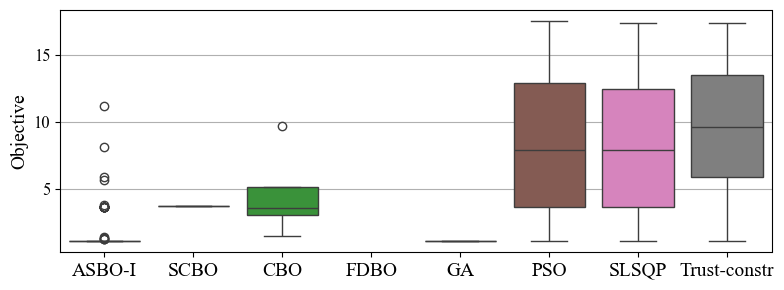

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_list8 = []
data = [data_list1, data_list2, data_list3, data_list8, data_list4, data_list5, data_list6, data_list7]
labels = ['ASBO-I', 'SCBO', 'CBO', 'FDBO','GA', 'PSO', 'SLSQP', 'Trust-constr']

plt.figure(figsize=(8, 3))
sns.boxplot(data=data)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontsize=14)
plt.ylabel('Objective', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig(DIR/'Box_Case3.png',dpi=300)
plt.show()


e:\ProgramData\miniconda3\envs\ASBO\lib\site-packages\seaborn\_base.py:779: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_dict[key] = pd.Series(var)
e:\ProgramData\miniconda3\envs\ASBO\lib\site-packages\seaborn\_base.py:779: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_dict[key] = pd.Series(var)


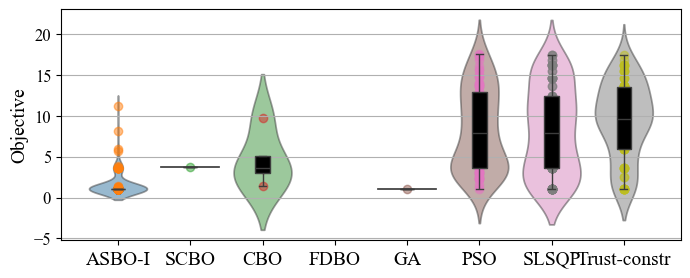

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [data_list1, data_list2, data_list3, data_list8, data_list4, data_list5, data_list6, data_list7]

plt.figure(figsize=(8, 3))

sns.violinplot(data=data, inner=None, alpha=0.5)
sns.boxplot(data=data, width=0.2, color='k', fliersize=0)

for i, algorithm in enumerate(data):
    plt.scatter([i] * len(algorithm), algorithm, alpha=0.5)

plt.xticks(ticks=np.arange(len(data)), 
           labels=['ASBO-I', 'SCBO', 'CBO','FDBO','GA', 'PSO', 'SLSQP', 'Trust-constr'], 
           fontsize=14)
plt.ylabel('Objective', fontsize=14)
plt.grid(axis='y')
plt.show()


In [7]:
file_path1 = DIR/'slsqp_Results_Case3_100.csv' 
data = pd.read_csv(file_path1)
part1 = data[data['success'] == True]
part2 = data[data['success'] == False]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15660\3990436127.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap="Blues", shade=True, cbar=True)


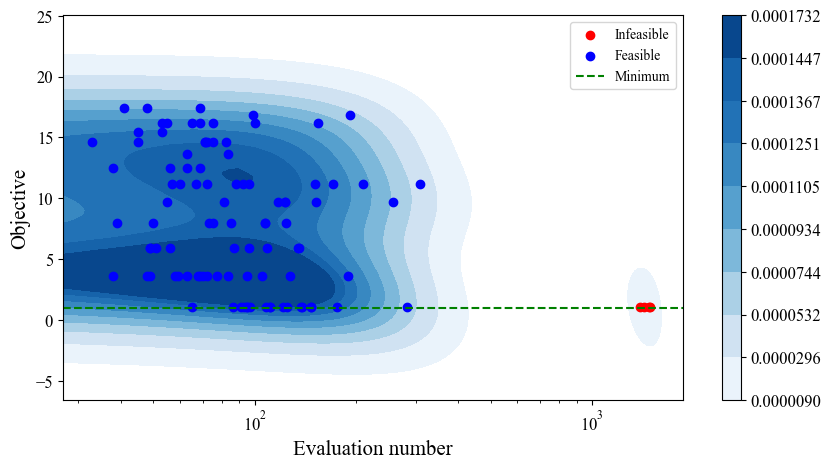

In [11]:

y = data.loc[:,'obj']
x = data.loc[:,'nfev']
y1 = part1.loc[:,'obj']
x1 = part1.loc[:,'nfev']
y2 = part2.loc[:,'obj']
x2 = part2.loc[:,'nfev']

plt.figure(figsize=(10, 5))
sns.kdeplot(x=x, y=y, cmap="Blues", shade=True, cbar=True)

plt.scatter(x2, y2, color='red', label='Infeasible')

plt.scatter(x1, y1, color='blue', label='Feasible')

plt.xscale('log')

plt.xlabel('Evaluation number',fontsize=15)
plt.ylabel('Objective',fontsize=15)

baseline = 1.007 #min(y) 
plt.axhline(baseline, color='green', linestyle='--', label='Minimum')
plt.legend()
plt.savefig(DIR/'Case 3_kdeplot.png',dpi=500, bbox_inches='tight')
plt.show()